# Introduction

The objective of this notebook is the Multi-Class Prediction of Obesity Risk Playground Series - Season 4, Episode 2 dataset.

We start with an exploratory data analysis and continue according to the gained insights with feature engineering. 

Finally we are going to implement and train a tree based model using the XGBoost algorithm.

The hyperparameters of the model will be tuned using the Optuna algorithm.

# Imports

To be able to analyse the the dataset and to develop our models we first have to import the following libraries. 

In [1]:
import warnings
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
import scipy.stats as stats
import optuna
from optuna.samplers import TPESampler

For plotting we use the style of the open-source data visualization package ggplot.

In [2]:
plt.style.use('ggplot')

# Get the data

We load the provided data as dataframes into our workspace. The data consists of the three files `train.csv`, `test.csv` and `sample_submission.csv`.

In [3]:
path = str("/kaggle/input/playground-series-s4e2")
train = pd.read_csv(f"{path}/train.csv")
test = pd.read_csv(f"{path}/test.csv")
submission = pd.read_csv(f"{path}/sample_submission.csv")
original_train = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')

train = pd.concat([train, original_train], axis=0)

# EDA

We are going to analyse the data in this section.

In [4]:
print(f"The training dataset consists of {train.shape[0]} rows and {train.shape[1]} columns.")
print(f"The test dataset consists of {test.shape[0]} rows and {test.shape[1]} columns.")

The training dataset consists of 22869 rows and 18 columns.
The test dataset consists of 13840 rows and 17 columns.


In [5]:
train.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

As we can see here the training data consists of 18 columns. Now we take a closer look at the data and print the first 5 and the last 5 samples of both the training dataset and the test dataset.

In [6]:
train.head().T

,0,1,2,3,4
id,0.0,1.0,2.0,3.0,4.0
Gender,Male,Female,Female,Female,Male
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,Sometimes,Frequently,Sometimes,Sometimes,Sometimes


In [7]:
train.tail().T

,2106,2107,2108,2109,2110
id,NaN,NaN,NaN,NaN,NaN
Gender,Female,Female,Female,Female,Female
Age,20.976842,21.982942,22.524036,24.361936,23.664709
Height,1.71073,1.748584,1.752206,1.73945,1.738836
Weight,131.408528,133.742943,133.689352,133.346641,133.472641
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,3.0,3.0,3.0,3.0,3.0
NCP,3.0,3.0,3.0,3.0,3.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes


In [8]:
test.head().T

,0,1,2,3,4
id,20758,20759,20760,20761,20762
Gender,Male,Female,Female,Male,Female
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,yes,yes,yes,yes,yes
FAVC,yes,yes,yes,yes,yes
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes


In [9]:
test.tail().T

,13835,13836,13837,13838,13839
id,34593,34594,34595,34596,34597
Gender,Male,Female,Female,Male,Male
Age,23.327836,29.0,22.935612,21.0,26.490926
Height,1.721384,1.59,1.585547,1.62,1.812259
Weight,78.030383,62.0,44.376637,53.0,120.980508
family_history_with_overweight,yes,no,no,yes,yes
FAVC,no,yes,yes,yes,yes
FCVC,2.813234,3.0,3.0,2.0,2.744994
NCP,3.0,3.0,2.27374,3.0,3.0
CAEC,Sometimes,Sometimes,Frequently,Sometimes,Sometimes


Below we have an overview of the data. As we see, there are no non-null values in both datasets and we can identify the numerica datatypes `int64`, `float64` and the categorical datatype`object`.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22869 entries, 0 to 2110
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  float64
 1   Gender                          22869 non-null  object 
 2   Age                             22869 non-null  float64
 3   Height                          22869 non-null  float64
 4   Weight                          22869 non-null  float64
 5   family_history_with_overweight  22869 non-null  object 
 6   FAVC                            22869 non-null  object 
 7   FCVC                            22869 non-null  float64
 8   NCP                             22869 non-null  float64
 9   CAEC                            22869 non-null  object 
 10  SMOKE                           22869 non-null  object 
 11  CH2O                            22869 non-null  float64
 12  SCC                             22869 

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13840 entries, 0 to 13839
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              13840 non-null  int64  
 1   Gender                          13840 non-null  object 
 2   Age                             13840 non-null  float64
 3   Height                          13840 non-null  float64
 4   Weight                          13840 non-null  float64
 5   family_history_with_overweight  13840 non-null  object 
 6   FAVC                            13840 non-null  object 
 7   FCVC                            13840 non-null  float64
 8   NCP                             13840 non-null  float64
 9   CAEC                            13840 non-null  object 
 10  SMOKE                           13840 non-null  object 
 11  CH2O                            13840 non-null  float64
 12  SCC                             

### Missing values

In [12]:
train.isna().sum()

id                                2111
Gender                               0
Age                                  0
Height                               0
Weight                               0
family_history_with_overweight       0
FAVC                                 0
FCVC                                 0
NCP                                  0
CAEC                                 0
SMOKE                                0
CH2O                                 0
SCC                                  0
FAF                                  0
TUE                                  0
CALC                                 0
MTRANS                               0
NObeyesdad                           0
dtype: int64

In [13]:
test.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
dtype: int64

**_Insight:_** There is just the `ìd` of the original data missing. We will drop that feature.

### Find duplicates

In [14]:
print(f"There are {train.duplicated().sum()} duplicates in the train data.")
print(f"There are {test.duplicated().sum()} duplicates in the test data.")
train.drop_duplicates(inplace=True)

There are 24 duplicates in the train data.
There are 0 duplicates in the test data.


We drop the duplicates because their number is very small in comparison to total number of training examples.

## Target analysis

We isolate the the target column `NObeyesdad`. Also we drop the column `id` as we don´t need it for our further analysis and also not for our model.

In [15]:
target = train["NObeyesdad"]
train.drop(columns=["id", "NObeyesdad"], inplace=True)
test_id = test["id"]
test.drop(columns=["id"], inplace=True)

After receiving an overview on the data, we now focus on the target data, working out the categories of the target data and their frequencies.

In [16]:
target.head()

0    Overweight_Level_II
1          Normal_Weight
2    Insufficient_Weight
3       Obesity_Type_III
4    Overweight_Level_II
Name: NObeyesdad, dtype: object

In [17]:
target.value_counts(ascending=False)

NObeyesdad
Obesity_Type_III       4370
Obesity_Type_II        3545
Normal_Weight          3364
Obesity_Type_I         3261
Overweight_Level_II    2812
Insufficient_Weight    2790
Overweight_Level_I     2703
Name: count, dtype: int64

The target falls apart into 7 categories being `Insufficient_Weight`, `Normal_Weight`, `Overweight_Level_I`, `Obesity_Type_I`, `Overweight_Level_II`, `Obesity_Type_II`, `Obesity_Type_III`.

The frequencies of the categories are all on the same scale although the most frequent category `Obesity_Type_III` contains almost the double amount of samples as the least frequent category `Overweight_Level_I`

Next we plot the distribution of the categories to visulalize the our insights.

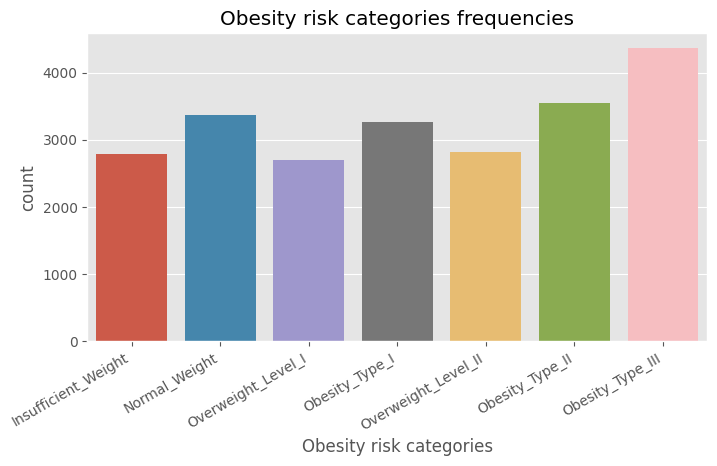

In [18]:
plt.figure(figsize=(8,4))
target_categories = [
    "Insufficient_Weight", 
    "Normal_Weight", 
    "Overweight_Level_I", 
    "Obesity_Type_I", 
    "Overweight_Level_II", 
    "Obesity_Type_II", 
    "Obesity_Type_III"
]
ax = sns.countplot(x=target, order=target_categories)
plt.title("Obesity risk categories frequencies")
plt.xlabel("Obesity risk categories")
ax.set_xticklabels(labels=ax.get_xticklabels(), rotation=30, ha="right")
plt.show()

## Feature analysis

### Separation of categorical and numerical features
Now we identify the categorical features and the numerical features as written above. We save their names to the variables `categorical_features` and `numerical_features` so we can easy access them in our further analysis.

In [19]:
categorical_features = train.select_dtypes(include=["object"]).columns
numerical_features = train.select_dtypes(include=["int64", "float64"]).columns

### Categorical features
After the target analysis we go on to the features. First we compare the categorical feature classes in the training data to their counterparts in the test data.

In [20]:
for feature in categorical_features:
    print(f"{feature}: {train[feature].unique()}")
    if feature == "NObeyesdad": continue
    print(f"{feature}: {test[feature].unique()}")    

Gender: ['Male' 'Female']
Gender: ['Male' 'Female']
family_history_with_overweight: ['yes' 'no']
family_history_with_overweight: ['yes' 'no']
FAVC: ['yes' 'no']
FAVC: ['yes' 'no']
CAEC: ['Sometimes' 'Frequently' 'no' 'Always']
CAEC: ['Sometimes' 'Always' 'Frequently' 'no']
SMOKE: ['no' 'yes']
SMOKE: ['no' 'yes']
SCC: ['no' 'yes']
SCC: ['no' 'yes']
CALC: ['Sometimes' 'no' 'Frequently' 'Always']
CALC: ['Sometimes' 'no' 'Frequently' 'Always']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Motorbike' 'Bike']
MTRANS: ['Public_Transportation' 'Automobile' 'Walking' 'Bike' 'Motorbike']


**_Insight:_** 

We can point out that the features `gender`, `family_history_with_overweight`, `FAVC`, `SMOKE` and `SCC` are binary, so we later will encode them with `0` and `1`.

The features `CAEC` and `CALC` have four classes. All of them are ordinal scaled, so we encode them with ascending numbers starting with zero.

`MTRANS` on the other hand has five classes and is nominal scaled therefore we use the one hot encoding technique on this feature.

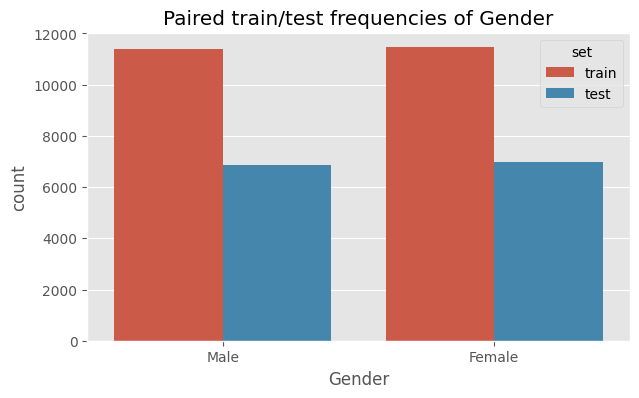

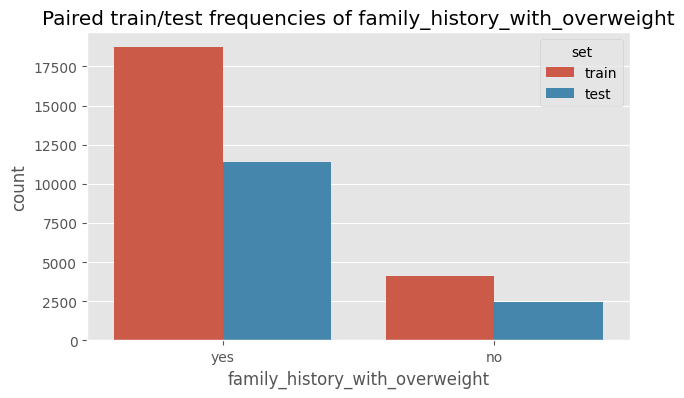

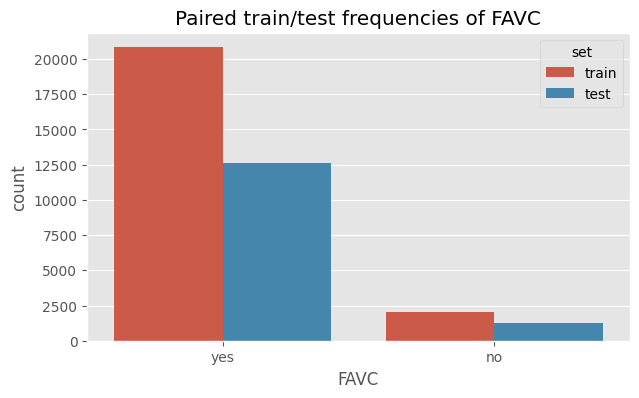

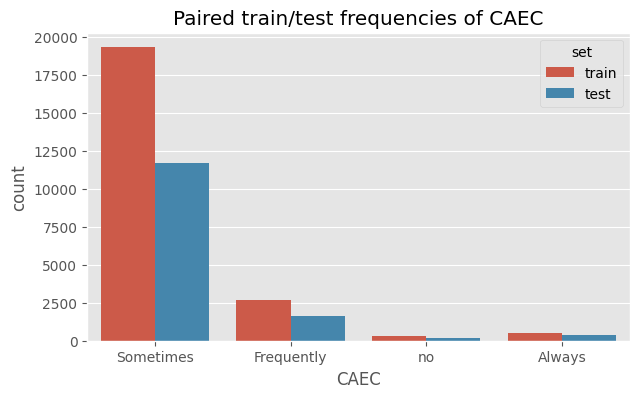

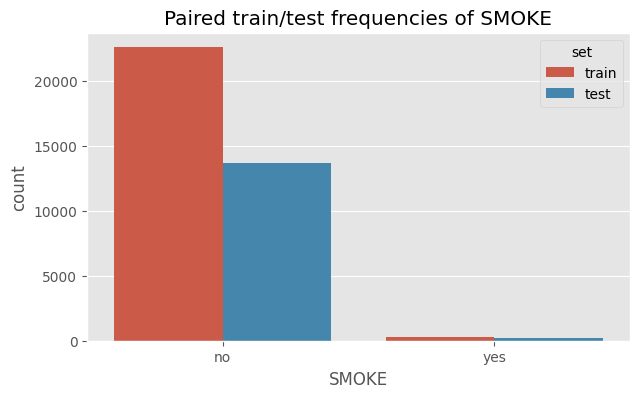

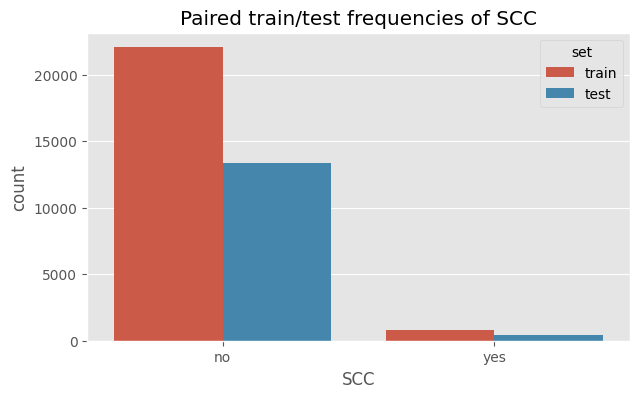

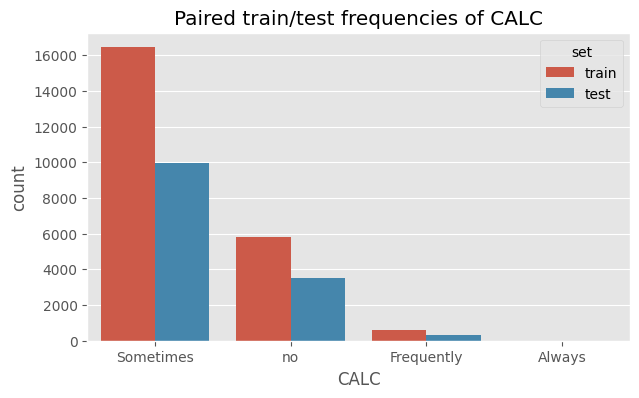

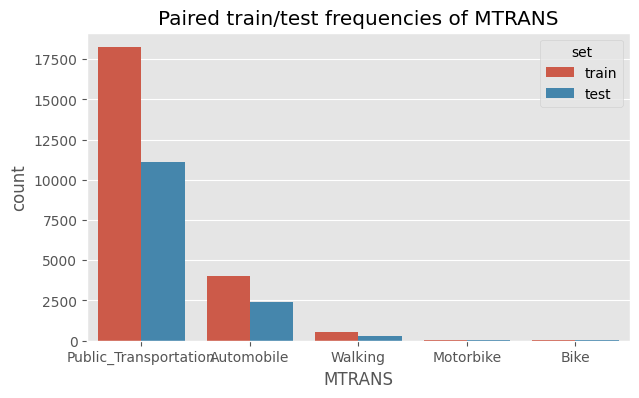

In [21]:
def plot_count_pairs(train, test, feature, hue="set"):
    df = train.copy()
    df["set"] = "train"
    df = pd.concat([df, test.copy()]).fillna("test")
    
    f, ax = plt.subplots(1, 1, figsize=(7, 4))
    sns.countplot(data=df, x=feature, hue=hue)
    ax.set_title(f"Paired train/test frequencies of {feature}")

for feature in categorical_features:
    if feature == "NObeyesdad": continue
    plot_count_pairs(train, test, feature)

### Numerical features

Next we take a look at the numerical features. We do some statistical analysis on both datasets and afterwards we compare the distribution of the values from `train` and `test`.

In [22]:
train[numerical_features].nunique()

Age       1739
Height    1862
Weight    2014
FCVC       975
NCP        740
CH2O      1568
FAF       1408
TUE       1329
dtype: int64

There is a big number of values for each feature, so we consider them all being continuous.

In [23]:
train.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000,22845.000000
mean,23.888513,1.700467,87.793761,2.443675,2.755837,2.027165,0.984585,0.620984
std,5.755338,0.087865,26.363367,0.533392,0.711185,0.608479,0.839728,0.602802
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.755907,0.015860,0.000000
50%,22.815416,1.700000,84.000000,2.393837,3.000000,2.000000,1.000000,0.582840
75%,26.000000,1.763029,111.531208,3.000000,3.000000,2.531984,1.600431,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [24]:
test.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000,13840.000000
mean,23.952740,1.698934,87.384504,2.442898,2.750610,2.032044,0.974532,0.611033
std,5.799814,0.088761,26.111819,0.531606,0.710927,0.611230,0.840361,0.608005
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631662,65.000000,2.000000,3.000000,1.771781,0.001086,0.000000
50%,22.906342,1.700000,83.952968,2.358087,3.000000,2.000000,1.000000,0.552498
75%,26.000000,1.760710,111.157811,3.000000,3.000000,2.552388,1.571865,1.000000
max,61.000000,1.980000,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


By comparing the statistics of the features of each dataset we can see that they are pretty close to another. Therefore we consider them to be equaliy distributed between the datasets.

Nevertheless we are going to visualize the distribution for each feature with a histogram plot and a box plot, so we can gain a better understanding of the data.

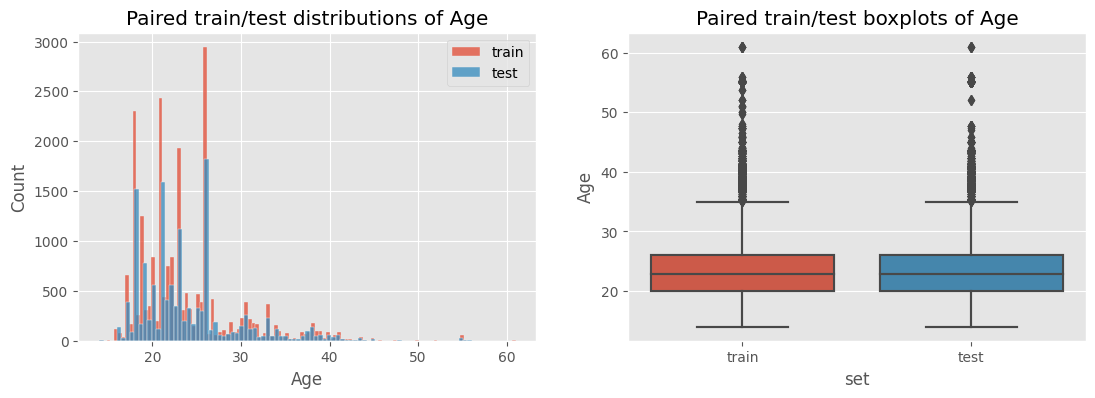

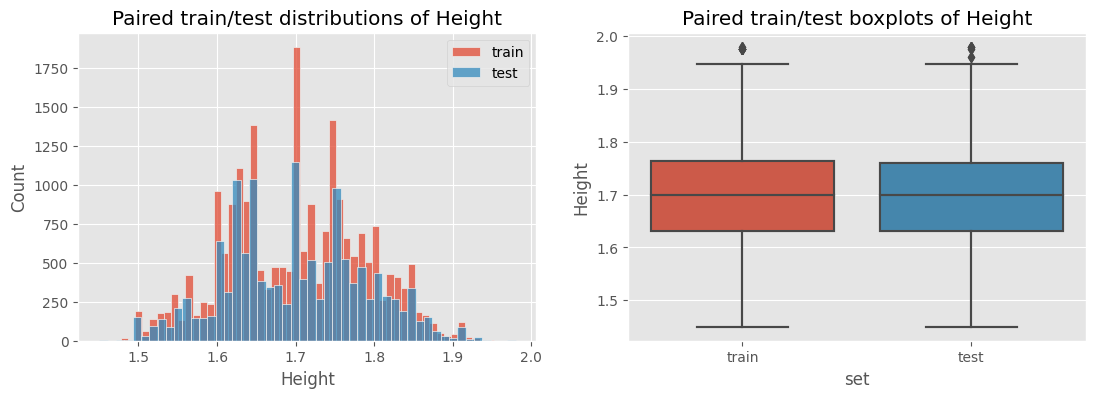

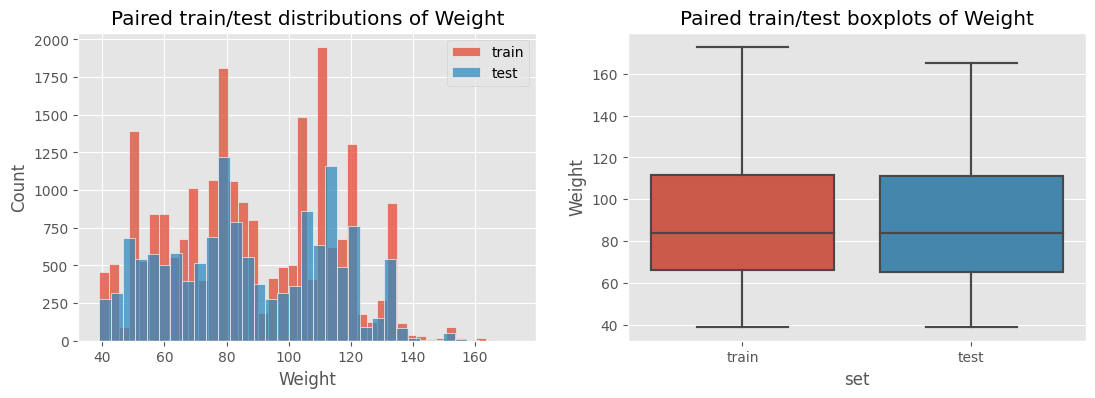

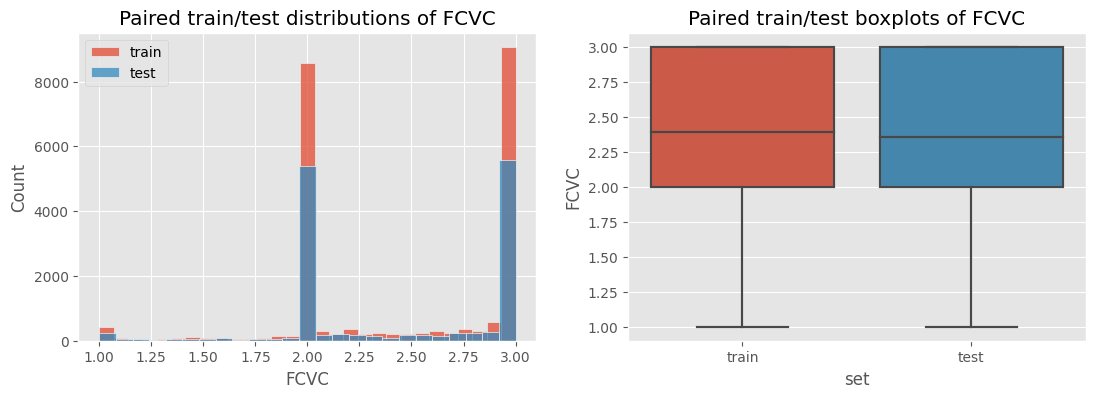

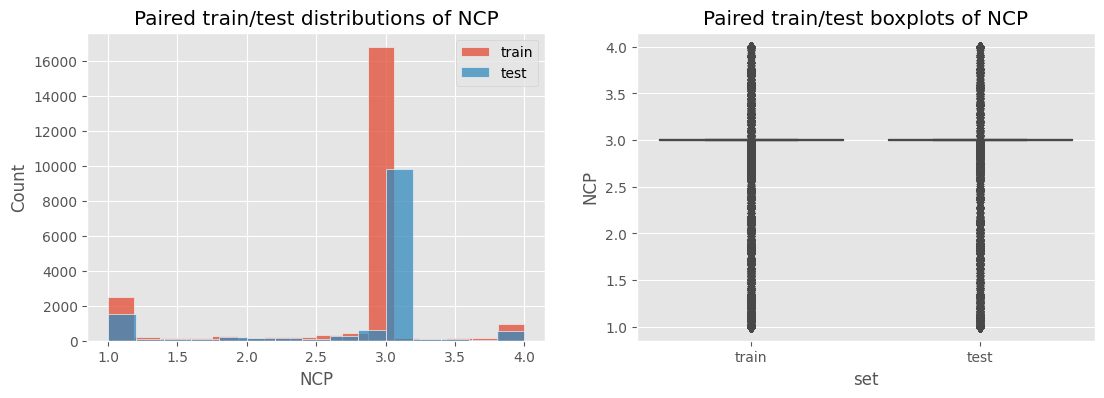

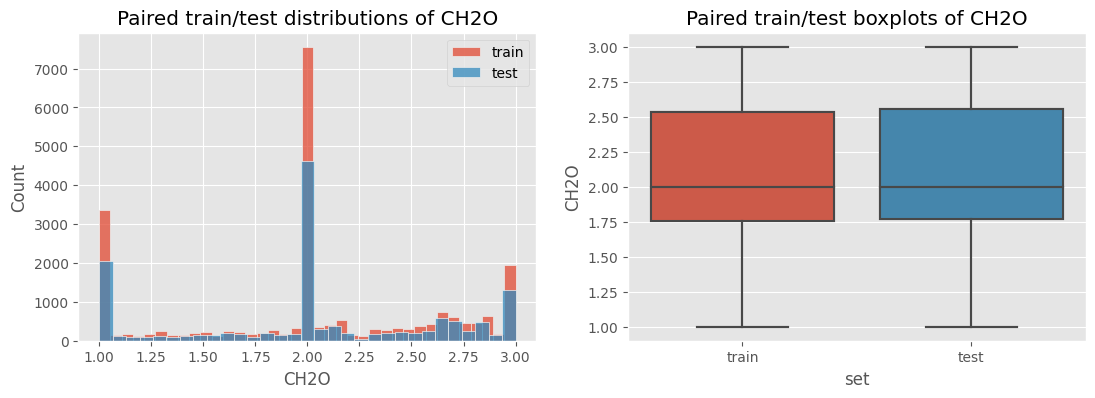

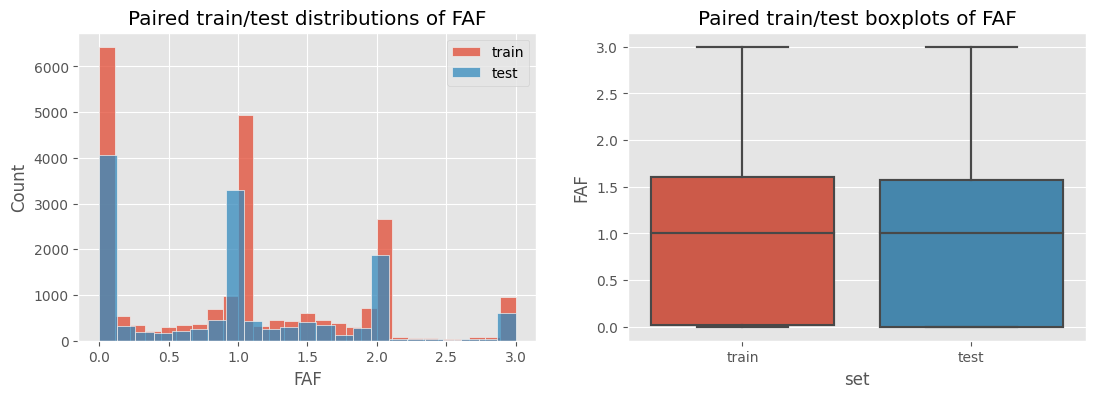

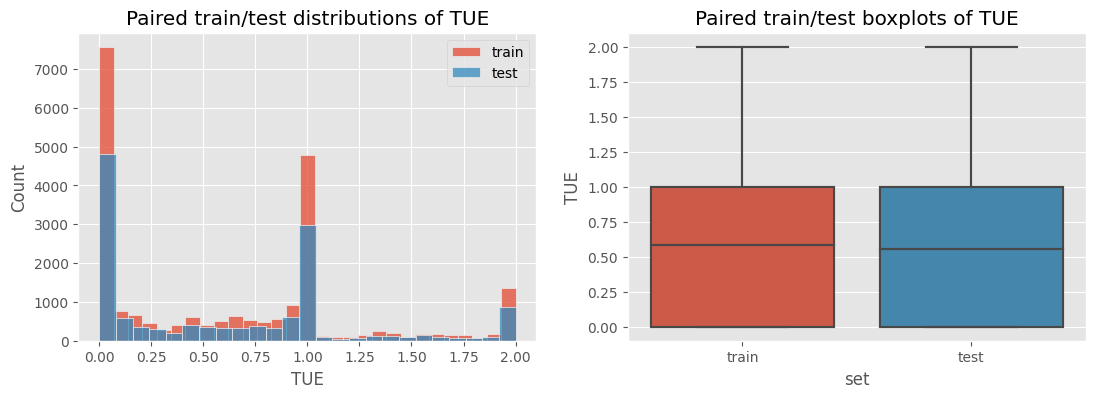

In [25]:
def plot_distribution_pairs(train, test, feature, hue="set", palette=None):
    df = train.copy()
    df["set"] = "train"    
    df = pd.concat([df, test.copy()]).fillna("test")
    df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    fig, ax = plt.subplots(1, 2, figsize=(13,4))
    for i, s in enumerate(df[hue].unique()):
        selection = df.loc[df[hue]==s, feature]
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", category=FutureWarning)
            g_hist = sns.histplot(selection, ax=ax[0], label=s)
            g_box = sns.boxplot(x=hue, y=feature, data=df, ax=ax[1])
    
    ax[0].set_title(f"Paired train/test distributions of {feature}")
    ax[1].set_title(f"Paired train/test boxplots of {feature}")
    
    g_hist.legend()
    plt.show()

for feature in numerical_features:
    plot_distribution_pairs(train, test, feature)

## Feature engineering
In this section we will encode the features as mentioned above.
Also we will encode the `target`, which  is ordinal scaled with seven classes. Therefore we encode them with ascending numbers starting from zero.

The code below also provides the dict `inverse_obesity_dict`. This gives us the possibility to revert our encoding of `target` for the submission.

Finally we observe our new created data and we also take a look at the correlation of each feature to the `target`.

In [26]:
feature_dict = {
    "Gender": {
        'Female': 0,
        'Male': 1 
    },
    "family_history_with_overweight": {
        'no': 0,
        'yes': 1 
    },
    "FAVC": {
        'no': 0,
        'yes': 1 
    },
    "CAEC": {
        'no': 0, 
        'Sometimes': 1, 
        'Frequently': 2, 
        'Always': 3
    },
    "SMOKE": {
        'no': 0, 
        'yes': 1
    },
    "SCC": {
        'no': 0, 
        'yes': 1
    },
    "CALC": {
        'no': 0,
        'Sometimes': 1,
        'Frequently': 2,
        "Always": 3,
    },
}

obesity_dict = {label: numeric for numeric, label in enumerate(target_categories)}
inverse_obesity_dict = {numeric: label for numeric, label in enumerate(target_categories)}

In [27]:
all_df = pd.concat([train, test], keys=[0, 1], axis=0)
for feature in categorical_features:
    if feature == "MTRANS":
        df_onehot = pd.get_dummies(all_df[feature])
        all_df = pd.concat([all_df, df_onehot], axis=1)
        all_df.drop(columns=[feature], inplace=True)
    else:
        all_df[feature] = all_df[feature].map(feature_dict[feature])

train = all_df.xs(0).copy()
test = all_df.xs(1).copy()
target = target.map(obesity_dict)

In [28]:
train.dtypes

Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight      int64
FAVC                                int64
FCVC                              float64
NCP                               float64
CAEC                                int64
SMOKE                               int64
CH2O                              float64
SCC                                 int64
FAF                               float64
TUE                               float64
CALC                                int64
Automobile                           bool
Bike                                 bool
Motorbike                            bool
Public_Transportation                bool
Walking                              bool
dtype: object

In [29]:
train.head().T

,0,1,2,3,4
Gender,1,0,0,0,1
Age,24.443011,18.0,18.0,20.952737,31.641081
Height,1.699998,1.56,1.71146,1.71073,1.914186
Weight,81.66995,57.0,50.165754,131.274851,93.798055
family_history_with_overweight,1,1,1,1,1
FAVC,1,1,1,1,1
FCVC,2.0,2.0,1.880534,3.0,2.679664
NCP,2.983297,3.0,1.411685,3.0,1.971472
CAEC,1,2,1,1,1
SMOKE,0,0,0,0,0


In [30]:
test.head().T

,0,1,2,3,4
Gender,1,0,0,1,0
Age,26.899886,21.0,26.0,20.979254,26.0
Height,1.848294,1.6,1.643355,1.553127,1.627396
Weight,120.644178,66.0,111.600553,103.669116,104.835346
family_history_with_overweight,1,1,1,1,1
FAVC,1,1,1,1,1
FCVC,2.938616,2.0,3.0,2.0,3.0
NCP,3.0,1.0,3.0,2.977909,3.0
CAEC,1,1,1,1,1
SMOKE,0,0,0,0,0


In [31]:
train.corrwith(target).abs().sort_values(ascending=False)

Weight                            0.896382
family_history_with_overweight    0.507723
Age                               0.356665
CAEC                              0.354491
FCVC                              0.289197
CH2O                              0.247825
FAF                               0.223323
CALC                              0.207421
SCC                               0.183722
FAVC                              0.178037
Height                            0.156911
TUE                               0.126218
Walking                           0.111386
Public_Transportation             0.056925
Gender                            0.050188
NCP                               0.041323
Motorbike                         0.030942
Bike                              0.027820
SMOKE                             0.012790
Automobile                        0.009492
dtype: float64

As we can see the most correlated features with the target are `Weight` and `family_history_with_overweight`.

# Model

Now we will build our model. Therefore we first have to split our data, the variables `X` and `y` we need for the optuna hyperparameter tuning. For fitting our baseline model as well as for our final model we need `X_train`, `X_val`, `y_train` and `y_val` and finally `X_test` for our submission.

In [32]:
X = train
y = target
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In the function below we fit and evaluate our model. Also we predict with our fitted model on the `X_train` and `X_eval` and plot the accuracy score. Finally we plot the logloss function during the fitting process and we mark the best epoch.

In [33]:
def fit_plot(model, X_train, y_train, X_val, y_val, verbose=100):
    eval_set = [(X_train, y_train), (X_val, y_val)]
    model.fit(X_train, y_train, eval_set=eval_set, verbose=verbose)
    
    acc_train = accuracy_score(y_train, model.predict(X_train))
    acc_val = accuracy_score(y_val, model.predict(X_val))
    print(f"train_accuracy: {acc_train:.4f}\ntest_accuracy: {acc_val:.4f}")
    
    results = model.evals_result()
    val_mlogloss = results["validation_1"]["mlogloss"]
    best_epopch = min(val_mlogloss)
    i_best_epoch = val_mlogloss.index(best_epopch)
    print(f"Best mlogloss: {best_epopch}\nBest epoch: {i_best_epoch}")
    epochs = len(results['validation_0']['mlogloss'])
    x_axis = range(0, epochs)
    
    fig, ax = plt.subplots()
    ax.plot(x_axis, results['validation_0']['mlogloss'], label='Train')
    ax.plot(x_axis, results['validation_1']['mlogloss'], label='Test')
    ax.plot(i_best_epoch, best_epopch, marker="o", color="green", label="Best")
    ax.legend()
    plt.xlabel("Epochs")
    plt.ylabel("M Log Loss")
    plt.title("M Log Loss developement while fitting")
    plt.show()

## Baseline model

[0]	validation_0-mlogloss:1.72207	validation_1-mlogloss:1.72508
[100]	validation_0-mlogloss:0.19659	validation_1-mlogloss:0.26065
[200]	validation_0-mlogloss:0.13253	validation_1-mlogloss:0.24945
[245]	validation_0-mlogloss:0.11516	validation_1-mlogloss:0.25089
train_accuracy: 0.9560
test_accuracy: 0.9129
Best mlogloss: 0.24910967374888335
Best epoch: 195


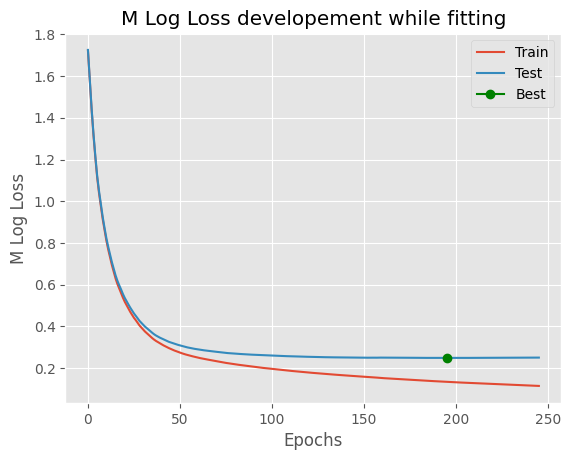

In [34]:
xgb_0 = XGBClassifier(
    learning_rate =0.1,
    n_estimators=1000,
    early_stopping_rounds=50,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    colsample_bytree=0.8,
    subsample=0.8,
    objective= 'multi:softprob',
    eval_metric = 'mlogloss',
    nthread=-1,
    random_state=42
)
fit_plot(xgb_0, X_train, y_train, X_val, y_val)

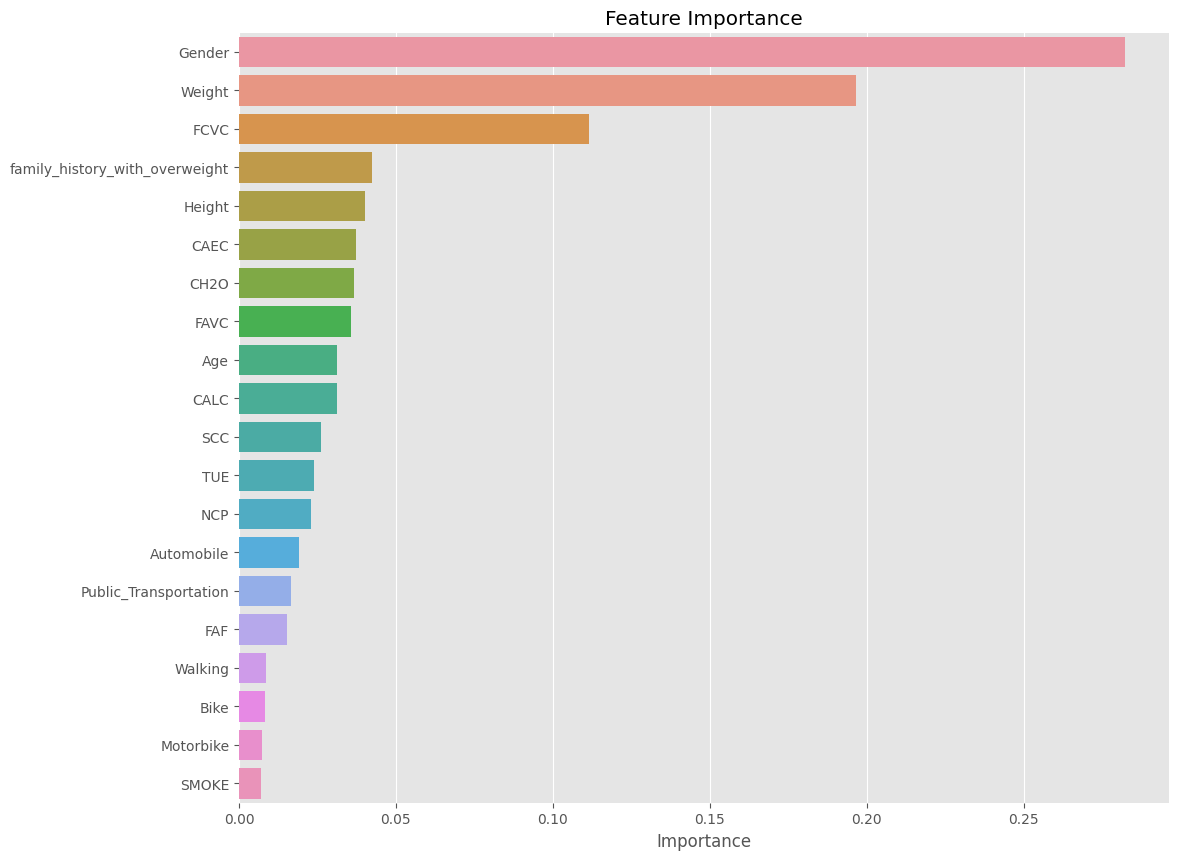

In [35]:
feature_importance = xgb_0.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

## Optuna

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer

In [ ]:
def objective(trial):
    learning_rate = trial.suggest_float("learning_rate", 0.01, 1, log=True)
    n_estimators = trial.suggest_int("n_estimators", 100, 1000)
    max_depth = trial.suggest_int("max_depth", 1, 20) 
    min_child_weight = trial.suggest_float("min_child_weight", 10, 30)
    gamma = trial.suggest_float("gamma", 1e-8, 1, log=True)
    colsample_bytree = trial.suggest_float("colsample_bytree", 0, 1)
    subsample = trial.suggest_float("subsample", 0, 1)
    reg_alpha = trial.suggest_float("reg_alpha", 1e-8, 10, log=True)
    reg_lambda = trial.suggest_float("reg_lambda", 1e-8, 10, log=True)
     
    params = {
        "learning_rate": learning_rate,
        "n_estimators": n_estimators,
        "max_depth": max_depth,
        "min_child_weight": min_child_weight,
        "gamma": gamma,
        "colsample_bytree": colsample_bytree,
        "subsample": subsample,
        "reg_alpha": reg_alpha,  
        "reg_lambda": reg_lambda,      
    }

    params["eval_metric"] = 'mlogloss'
    params["objective"] = "multi:softprob"
    params["nthread"] = -1
    params["random_state"] = 42
    
    model = XGBClassifier(**params)
    scorer = make_scorer(accuracy_score)
    cv_splits = cv.split(X_train, y=y_train)
    scores = cross_validate(model, X_train, y_train, cv=cv_splits, scoring=scorer)
    accuracy = np.mean(scores['test_score'])
       
    return accuracy

cv = StratifiedKFold(5, shuffle=True, random_state=42)

sampler = TPESampler(seed=42)
study = optuna.create_study(directions=["maximize"], sampler=sampler)
study.optimize(objective, n_trials=100)
study_df = study.trials_dataframe()
study_best = study_df.sort_values(by='value', ascending=False)
best_params = study.best_params
print(best_params)

[I 2024-02-12 21:59:16,497] A new study created in memory with name: no-name-fc3466af-aed3-4073-9ed0-3c45a85ff993
[I 2024-02-12 21:59:56,146] Trial 0 finished with value: 0.8638103733682165 and parameters: {'learning_rate': 0.05611516415334506, 'n_estimators': 956, 'max_depth': 15, 'min_child_weight': 21.973169683940732, 'gamma': 1.77071686435378e-07, 'colsample_bytree': 0.15599452033620265, 'subsample': 0.05808361216819946, 'reg_alpha': 0.6245760287469893, 'reg_lambda': 0.002570603566117598}. Best is trial 0 with value: 0.8638103733682165.
[I 2024-02-12 22:00:02,625] Trial 1 finished with value: 0.892755689726911 and parameters: {'learning_rate': 0.2607024758370766, 'n_estimators': 118, 'max_depth': 20, 'min_child_weight': 26.648852816008436, 'gamma': 4.997040685255803e-07, 'colsample_bytree': 0.18182496720710062, 'subsample': 0.18340450985343382, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}. Best is trial 1 with value: 0.892755689726911.
[I 2024-02-12 22:00:

In [38]:
best_params ={
    'learning_rate': 0.025712050975722187,
    'n_estimators': 558,
    'max_depth': 19,
    'min_child_weight': 11.692175971190222,
    'gamma': 0.40432112145823784,
    'colsample_bytree': 0.46430548509054603,
    'subsample': 0.8210990373796265,
    'reg_alpha': 3.768397197231378e-05,
    'reg_lambda': 1.3981775427791863
}
best_params["objective"] = "multi:softprob"
best_params["eval_metric"] = 'mlogloss'
best_params["early_stopping_rounds"] = 50
best_params["nthread"] = -1
best_params["random_state"] = 42

In [39]:
study_best.head()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_gamma,params_learning_rate,params_max_depth,params_min_child_weight,params_n_estimators,params_reg_alpha,params_reg_lambda,params_subsample,state
91,91,0.916831,2024-02-12 20:50:16.858413,2024-02-12 20:51:03.072538,0 days 00:00:46.214125,0.464305,0.404321,0.025712,19,11.692176,558,0.000038,1.398178,0.821099,COMPLETE
53,53,0.916612,2024-02-12 20:24:00.541192,2024-02-12 20:24:52.838933,0 days 00:00:52.297741,0.495416,0.227522,0.020456,20,12.686420,582,0.012667,0.866175,0.795505,COMPLETE
54,54,0.916393,2024-02-12 20:24:52.841159,2024-02-12 20:25:45.884987,0 days 00:00:53.043828,0.527479,0.220352,0.020195,20,11.760916,572,0.007903,0.859589,0.793369,COMPLETE
69,69,0.916174,2024-02-12 20:36:26.809729,2024-02-12 20:37:03.551459,0 days 00:00:36.741730,0.550834,0.002375,0.029892,18,14.090843,379,0.002704,1.111419,0.768315,COMPLETE
60,60,0.916174,2024-02-12 20:29:08.264196,2024-02-12 20:30:03.131766,0 days 00:00:54.867570,0.498309,0.004995,0.020479,19,11.511864,538,0.003960,0.122301,0.647437,COMPLETE


In [40]:
optuna.visualization.plot_optimization_history(study)

In [41]:
optuna.visualization.plot_parallel_coordinate(study)

In [42]:
params = ["learning_rate", "n_estimators", "max_depth", "min_child_weight", "gamma", "colsample_bytree", "subsample", "reg_alpha", "reg_lambda"]
optuna.visualization.plot_slice(study, params=params)

In [43]:
optuna.visualization.plot_param_importances(study)

[0]	validation_0-mlogloss:1.89380	validation_1-mlogloss:1.89487
[100]	validation_0-mlogloss:0.46109	validation_1-mlogloss:0.49718
[200]	validation_0-mlogloss:0.26295	validation_1-mlogloss:0.31601
[300]	validation_0-mlogloss:0.20196	validation_1-mlogloss:0.26969
[400]	validation_0-mlogloss:0.17470	validation_1-mlogloss:0.25345
[500]	validation_0-mlogloss:0.16015	validation_1-mlogloss:0.24721
[557]	validation_0-mlogloss:0.15502	validation_1-mlogloss:0.24560
train_accuracy: 0.9507
test_accuracy: 0.9146
Best mlogloss: 0.24560389630736135
Best epoch: 557


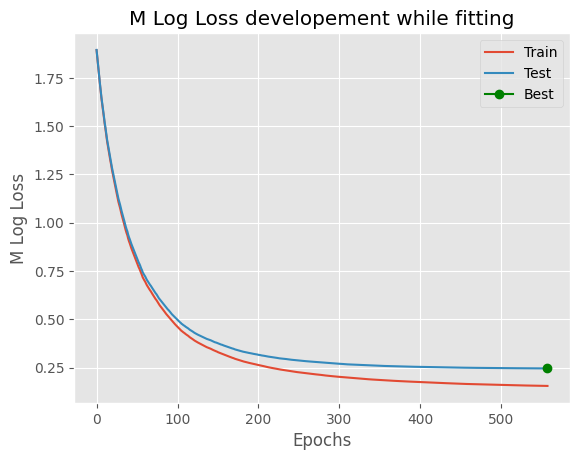

In [44]:
xgb_1 = XGBClassifier(**best_params)
fit_plot(xgb_1, X_train, y_train, X_val, y_val)

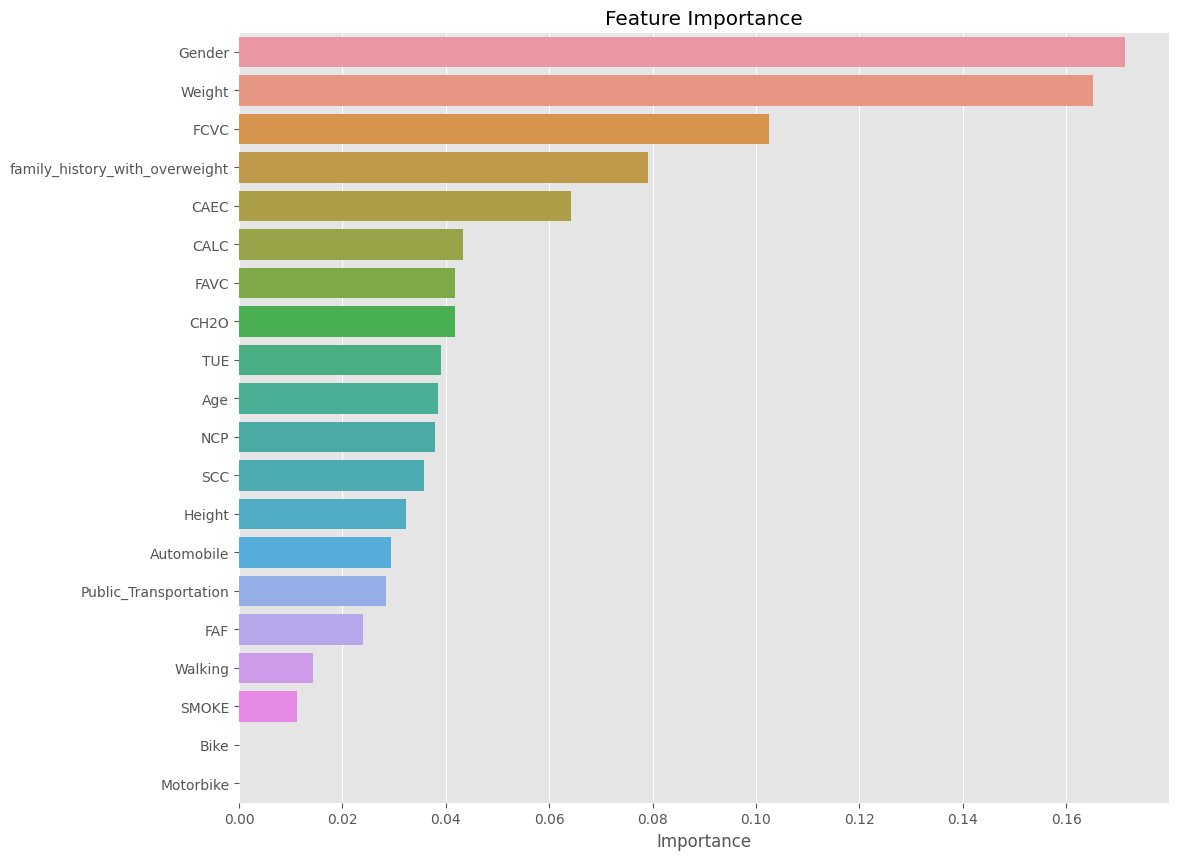

In [45]:
feature_importance = xgb_1.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()

# Submission

In [47]:
best = xgb_1
predictions = best.predict(X_test)
submission["NObeyesdad"] = predictions
submission["NObeyesdad"] = submission["NObeyesdad"].map(inverse_obesity_dict)
submission.head(10)

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
5,20763,Insufficient_Weight
6,20764,Insufficient_Weight
7,20765,Normal_Weight
8,20766,Overweight_Level_II
9,20767,Normal_Weight


In [48]:
submission.to_csv("submission.csv", index=False)